In [1]:
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd assignment1/

/Users/apple/Downloads/assignment1


In [5]:
def svm_loss_naive(W, X, y, reg):
    d, C = W.shape
    _, N = X.shape
    
    loss = 0
    dW = np.zeros_like(W)
    for n in range(N):
        xn = X[:, n]
        score = W.T.dot(xn)
        for j in range(C):
            if j ==y[n]:
                continue
            margin = 1 - score[y[n]] + score[j]
            if margin > 0:
                loss += margin
                dW[:, j] += xn
                dW[:, y[n]] -= xn
    
    loss /= N
    loss += 0.5*reg*np.sum(W*W)
    
    dW /= N
    dW += reg*W
    return loss, dW

In [6]:
N, C, d = 10, 3, 5
reg = .1
W = np.random.randn(d, C)
X = np.random.randn(d, N)
y = np.random.randint(C, size=N)

print("Loss without regularizaton: ", svm_loss_naive(W, X, y, 0)[0])
print("Loss with regularizaton: ", svm_loss_naive(W, X, y, .1)[0])

Loss without regularizaton:  3.3848320569457657
Loss with regularizaton:  4.227800858218987


In [11]:
def svm_loss_vectorized(W, X, y, reg):
    d, C = W.shape
    _, N = X.shape
    loss = 0
    dW = np.zeros_like(W)
    
    Z = W.T.dot(X)
    
    correct_class_score = np.choose(y, Z).reshape(N, 1).T
    margins = np.maximum(0, Z - correct_class_score + 1)
    margins[y, np.arange(margins.shape[1])] = 0
    loss = np.sum(margins, axis=(0, 1))
    loss /= N
    loss += 0.5 * reg * np.sum(W*W)
    
    F = (margins > 0).astype(int)
    F[y, np.arange(F.shape[1])] = np.sum(-F, axis=0)
    dW = X.dot(F.T)/N + reg*W
    return loss, dW

In [12]:
N, C, d = 49000, 10, 3073
reg = .1
W = np.random.randn(d, C)
X = np.random.randn(d, N)
y = np.random.randint(C, size=N)

import time
t1 = time.time()
l1, dW1 = svm_loss_naive(W, X, y, reg)
t2 = time.time()
print("Naive run time: ", t2-t1, " s")

t1 = time.time()
l2, dW2 = svm_loss_vectorized(W, X, y, reg)
t2 = time.time()
print("Vectorized run time: ", t2-t1, " s")
print("Loss difference: ",  np.linalg.norm(l1-l2))
print("gradient difference: ", np.linalg.norm(dW1-dW2))

Naive run time:  32.44379687309265  s
Vectorized run time:  0.37920594215393066  s
Loss difference:  5.9117155615240335e-12
gradient difference:  2.7411823641150342e-14


In [24]:
print("W = ", W.shape)
print("X = ", X.shape)
print("y = ", y.shape)

W =  (3073, 10)
X =  (3073, 49000)
y =  (49000,)


In [42]:
def multiclass_svm_GD(X, y, Winit, reg, lr=.1, batch_size=100, num_iters=1000, print_every=100):
    W = Winit
    loss_history = np.zeros((num_iters))
    for it in range(num_iters):
        idx = np.random.choice(X.shape[1], batch_size)
        X_batch = X[:, idx]
        y_batch = y[idx]
        
        loss_history[it], dW = svm_loss_vectorized(W, X_batch, y_batch, reg)
        
        W -= lr*dW
        if it % print_every ==1:
            print("it %d/%d, loss = %f" %(it, num_iters, loss_history[it]))
    return W, loss_history

In [43]:
N, C, d = 49000, 10, 3073
reg = .1
W = np.random.randn(d, C)
X = np.random.randn(d, N)
y = np.random.randint(C, size=N)

w1, loss_histrory = multiclass_svm_GD(X, y, W, reg)

it 1/1000, loss = 1865.712543
it 101/1000, loss = 250.982481
it 201/1000, loss = 57.264287
it 301/1000, loss = 47.199708
it 401/1000, loss = 46.257124
it 501/1000, loss = 45.641876
it 601/1000, loss = 41.919911
it 701/1000, loss = 40.900015
it 801/1000, loss = 37.723659
it 901/1000, loss = 44.845825


In [3]:
from cs231n.data_utils import load_CIFAR10

cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
# Clear previous data
try:
   del Xtr, Ytr
   del Xte, Yte
   print('Clear previously loaded data.')
except:
   pass
# Load data from file
Xtr, Ytr, Xte, Yte = load_CIFAR10(cifar10_dir)
print(Xtr.shape)
print(Ytr.shape)
print(Xte.shape)
print(Yte.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [4]:
Xtr = Xtr.reshape(Xtr.shape[0], 32*32*3) # 50000 x 3072
Xte = Xte.reshape(Xte.shape[0], 32*32*3) # 10000 x 3072
Xval = Xtr[:1000, :] # take first 1000 for validation
Yval = Ytr[:1000]
Xtr = Xtr[1000:, :] # keep last 49000 for train
Ytr = Ytr[1000:]
Xdev = Xtr[np.random.choice(Xtr.shape[0], 500, replace=False)]
Ydev = Ytr[np.random.choice(Xtr.shape[0], 500, replace=False)]
Xte = Xte[:1000]
Yte = Yte[:1000]

print("Train data: ", Xtr.shape)
print("Train label: ", Ytr.shape)
print("Validation data: ", Xval.shape)
print("Validation label: ", Yval.shape)
print("Development data: ", Xdev.shape)
print("Development label: ", Ydev.shape)

Train data:  (49000, 3072)
Train label:  (49000,)
Validation data:  (1000, 3072)
Validation label:  (1000,)
Development data:  (500, 3072)
Development label:  (500,)


In [5]:
mean_image = np.mean(Xtr, axis=0)

Xtr -= mean_image
Xval -= mean_image
Xdev -= mean_image
Xte -= mean_image

Xtr = np.hstack([Xtr, np.ones((Xtr.shape[0], 1))])
Xval = np.hstack([Xval, np.ones((Xval.shape[0], 1))])
Xdev = np.hstack([Xdev, np.ones((Xdev.shape[0], 1))])
Xte = np.hstack([Xte, np.ones((Xte.shape[0], 1))])

print("Train data: ", Xtr.shape)
print("Validation data: ", Xval.shape)
print("Development data: ", Xdev.shape)
print("Test data: ", Xte.shape)

Train data:  (49000, 3073)
Validation data:  (1000, 3073)
Development data:  (500, 3073)
Test data:  (1000, 3073)


In [33]:
reg = .0001
W = np.random.randn(3073, 10) * 0.0001

t1 = time.time()
l1, dW1 = svm_loss_naive(W, Xdev.T, Ydev, reg)
t2 = time.time()
print("Naive run time: ", t2-t1, " s")

t1 = time.time()
l2, dW2 = svm_loss_vectorized(W, Xdev.T, Ydev, reg)
t2 = time.time()
print("Vectorized run time: ", t2-t1, " s")
print("Loss difference: %f" %np.linalg.norm(l1-l2))
print("gradient difference: %f" %np.linalg.norm(dW1-dW2, ord='fro'))

Naive run time:  0.18834733963012695  s
Vectorized run time:  0.0057451725006103516  s
Loss difference: 0.000000
gradient difference: 0.000000


In [45]:
reg = 5e4
w1, loss_history = multiclass_svm_GD(Xtr_rows.T, Ytr, W, reg, lr=5e-7, num_iters=1500)

it 1/1500, loss = 8980596047.260258
it 101/1500, loss = 56786831.675077
it 201/1500, loss = 359090.553371
it 301/1500, loss = 2261.631445
it 401/1500, loss = 16.920966
it 501/1500, loss = 6.335840
it 601/1500, loss = 5.752169
it 701/1500, loss = 6.188099
it 801/1500, loss = 6.612970
it 901/1500, loss = 5.901136
it 1001/1500, loss = 5.767022
it 1101/1500, loss = 5.760328
it 1201/1500, loss = 5.420227
it 1301/1500, loss = 6.399105
it 1401/1500, loss = 5.546385


In [7]:
from cs231n.classifiers.linear_svm import *

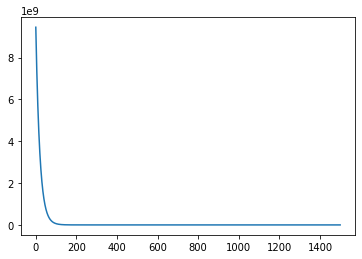

In [46]:
plt.plot(loss_history)
plt.show()

In [8]:
W = np.random.randn(3073, 10) * 0.0001
loss1, grad1 = svm_loss_naive(W, Xdev, Ydev, 0.000005)
# loss2, grad2 = svm_loss_vectorized(W, Xdev, Ydev, 0.0001)

print("Naive loss: %f" %loss1)
# print("Vectorized loss: ", loss2)
# print("Difference: ", np.linalg.norm(grad1 - grad2, ord='fro'))

Naive loss: 9.070368


In [8]:
loss, grad = svm_loss_naive(W, Xdev, Ydev, 0.0)

from cs231n.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, Xdev, Ydev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

loss, grad = svm_loss_naive(W, Xdev, Ydev, 5e1)
f = lambda w: svm_loss_naive(w, Xdev, Ydev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: 19.448358 analytic: 19.448358, relative error: 1.293745e-11
numerical: 2.853086 analytic: 2.853086, relative error: 1.207566e-10
numerical: -1.712979 analytic: -1.712979, relative error: 8.758878e-12
numerical: 9.677122 analytic: 9.677122, relative error: 4.966284e-13
numerical: -11.572959 analytic: -11.572959, relative error: 1.567691e-11
numerical: -10.512901 analytic: -10.512901, relative error: 1.339918e-11
numerical: 9.573070 analytic: 9.573070, relative error: 1.912311e-11
numerical: 5.636080 analytic: 5.636080, relative error: 8.401646e-12
numerical: -1.744306 analytic: -1.744306, relative error: 2.936942e-11
numerical: 12.033721 analytic: 12.033721, relative error: 1.059218e-11
numerical: -8.290831 analytic: -8.290831, relative error: 5.091452e-11
numerical: 0.567679 analytic: 0.567679, relative error: 4.347455e-10
numerical: 12.702580 analytic: 12.702580, relative error: 2.835511e-12
numerical: 2.233226 analytic: 2.233226, relative error: 1.894417e-11
numerical: -9.

In [9]:
import time

tic = time.time()
l1, g1 = svm_loss_naive(W, Xdev, Ydev, 0.000005)
toc = time.time()
print("Naive loss: %e computed in %f s" %(l1, toc - tic))

tic = time.time()
l2, _ = svm_loss_vectorized(W, Xdev, Ydev, 0.000005)
toc = time.time()
print("Vectorized loss: %e computed in %f s" %(l2, toc - tic))

print("Difference: %f" %(l1 - l2))

tic = time.time()
_, g1 = svm_loss_naive(W, Xdev, Ydev, 0.000005)
toc = time.time()
print("Naive loss and gradient: computed in %f s" %(toc - tic))

tic = time.time()
_, g2 = svm_loss_vectorized(W, Xdev, Ydev, 0.000005)
toc = time.time()
print("Vectorized loss and gradient: computed in %f s" %(toc - tic))

difference = np.linalg.norm(g1 - g2, ord='fro')
print("Difference: %f " %difference)

Naive loss: 9.070368e+00 computed in 0.397194 s
Vectorized loss: 9.070368e+00 computed in 0.016785 s
Difference: 0.000000
Naive loss and gradient: computed in 0.264623 s
Vectorized loss and gradient: computed in 0.005687 s
Difference: 0.000000 


In [16]:
from cs231n.classifiers import LinearSVM
svm = LinearSVM()
loss_hist = svm.train(Xtr, Ytr, learning_rate=5e-7, reg=5e4, num_iters=1500, verbose=True)

iteration 0 / 1500: loss 787.455917
iteration 100 / 1500: loss 11.013106
iteration 200 / 1500: loss 6.339079
iteration 300 / 1500: loss 6.071987
iteration 400 / 1500: loss 5.839518
iteration 500 / 1500: loss 5.449061
iteration 600 / 1500: loss 5.272079
iteration 700 / 1500: loss 6.070000
iteration 800 / 1500: loss 5.982912
iteration 900 / 1500: loss 5.944096
iteration 1000 / 1500: loss 5.983709
iteration 1100 / 1500: loss 5.162269
iteration 1200 / 1500: loss 5.639383
iteration 1300 / 1500: loss 5.160007
iteration 1400 / 1500: loss 5.400599


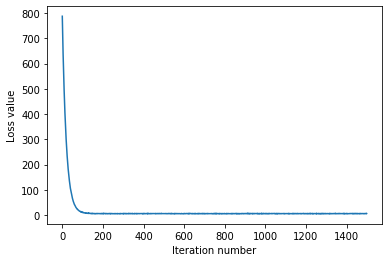

In [17]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [18]:
Ytr_pred = svm.predict(Xtr)
print("Training accuracy: %f" %(np.mean(Ytr==Ytr_pred),))
Yval_pred = svm.predict(Xval)
print("validation accuracy: %f" %(np.mean(Yval==Yval_pred)))

Training accuracy: 0.351633
validation accuracy: 0.353000


In [20]:
learning_rates = [1e-7, 1e-6]
regularization_strengths = [2e4, 2.5e4, 3e4, 3.5e4, 4e4, 4.5e4, 5e4, 6e4]

results = {}
best_val = -1
best_svm = None

for lr in learning_rates:
    for r in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(Xtr, Ytr, learning_rate=lr, reg=r, num_iters=2500, verbose=False)
        Ytr_pred = svm.predict(Xtr)
        Yval_pred = svm.predict(Xval)
        acc_train = np.mean(Ytr == Ytr_pred)
        acc_val = np.mean(Yval == Yval_pred)
        results[(lr, r)] = (acc_train, acc_val)
        print(lr, r, acc_train, acc_val)
        if acc_val > best_val:
            best_val = acc_val
            best_svm = svm
            
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print("lr %e reg %e train accuracy: %f val accuracy: %f" %(lr, reg, train_accuracy, val_accuracy))
    
print("Best validation: %f" %best_val)

1e-07 20000.0 0.38271428571428573 0.38
1e-07 25000.0 0.3828367346938776 0.369
1e-07 30000.0 0.3727755102040816 0.37
1e-07 35000.0 0.3744081632653061 0.373
1e-07 40000.0 0.36918367346938774 0.373
1e-07 45000.0 0.37520408163265306 0.37
1e-07 50000.0 0.3697142857142857 0.364
1e-07 60000.0 0.3637959183673469 0.358
1e-06 20000.0 0.29183673469387755 0.269
1e-06 25000.0 0.31971428571428573 0.301
1e-06 30000.0 0.27855102040816326 0.281
1e-06 35000.0 0.2724285714285714 0.24
1e-06 40000.0 0.289734693877551 0.292
1e-06 45000.0 0.30787755102040815 0.303
1e-06 50000.0 0.2602244897959184 0.259
1e-06 60000.0 0.295734693877551 0.308
lr 1.000000e-07 reg 2.000000e+04 train accuracy: 0.382714 val accuracy: 0.380000
lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.382837 val accuracy: 0.369000
lr 1.000000e-07 reg 3.000000e+04 train accuracy: 0.372776 val accuracy: 0.370000
lr 1.000000e-07 reg 3.500000e+04 train accuracy: 0.374408 val accuracy: 0.373000
lr 1.000000e-07 reg 4.000000e+04 train accuracy: 0.

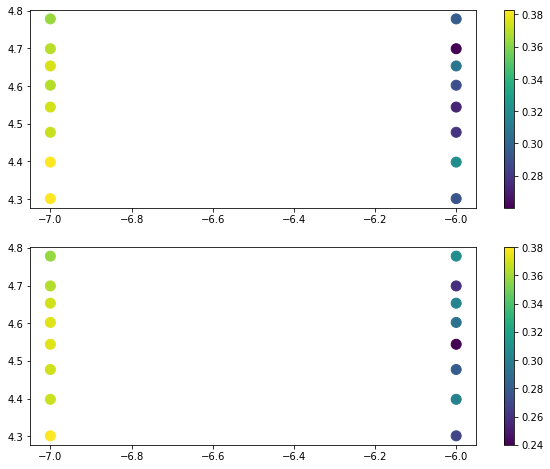

In [24]:
import math

x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

marker_size = 100
colors = [results[x][0] for x in results]
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()

colors = [results[x][1] for x in results]
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.show()

In [32]:
# Use best_svm (best of learning rate & regularization strength) to predict on test set
Yte_pred = best_svm.predict(Xte)
test_accuracy = np.mean(Yte == Yte_pred)
print("Linear SVM on raw pixel test set accuracy: %.2f %%" % int(100*test_accuracy))

Linear SVM on raw pixel test set accuracy: 38.00 %


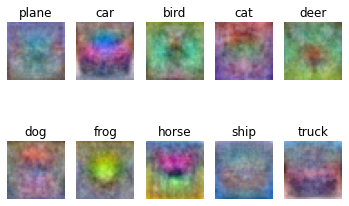

In [37]:
w = best_svm.W[:-1, :] # remove bias trick [3072 x 10]
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i+1)
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])